In [1]:
import pandas as pd
import os
import seaborn as sns
from statsmodels.regression.linear_model import OLS, WLS
import statsmodels.regression.linear_model as lm
import statsmodels.stats.diagnostic as smsdia
import statsmodels.stats.outliers_influence as oi
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from plotly import __version__
print(__version__) # it should be above 1.9
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
# connected = True, plotly connects pandas to interactive java library
import colorlover as cl
init_notebook_mode(connected=True)
print(cf.__version__)
cf.go_offline()

%matplotlib inline

3.3.0


0.14.5


In [2]:
bp = pd.read_csv('/Users/hari/Data/Building_Permits_Issued.csv')

/Users/hari/anaconda3/envs/NSSdatascience/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
bp.head()

Permit #                   Permit Type Description  \
0  2018002927                Building Residential - New   
1   201617929                  Building Use & Occupancy   
2  2016049270                      Building Sign Permit   
3  2016029907   Building Residential - Roofing / Siding   
4   201533533  Building Residential - Tenant Finish Out   

                Permit Subtype Description          Parcel Date Entered  \
0                  Single Family Residence  081160R00100CO   01/18/2018   
1                            Tents, Stages     09215014800   04/19/2016   
2              Sign - Ground /  Wall Signs     11909014000   09/14/2016   
3                                   Duplex  075150A13900CO   06/20/2016   
4  Multifamily, Tri-Plex, Quad, Apartments     10404024100   08/07/2015   

  Date Issued  Const. Cost                 Address       City State    Zip  \
0  02/12/2018     206150.0        1017A  MONROE ST  NASHVILLE    TN  37208   
1  04/21/2016       2000.0      2300  WEST END AVE  NASHVILLE    TN  37203   
2  09/14/2016      15000.0  2802  NOLENSVILLE PIKE  NASHVILLE    TN  37211   
3  06/20/2016      17648.0    139  STONERS GLEN DR  HERMITAGE    TN  37076   
4  11/17/2015     542696.0          70  MUSIC SQ W  NASHVILLE    TN  37203   

                                     Subdivision/Lot  \
0                                 UNIT A 1017 MONROE   
1               N W CORNER WEST END AVE & 23RD AVE N   
2                             PT LOT 2 PATTERSON SUB   
3                      UNIT 139 STONERS GLEN PHASE 1   
4  LOT 1 O.B. HAYES FIRST PLAN CONSOLIDATION OF L...   

                         Contact Permit Type Permit Subtype  IVR Trk#  \
0      TRISTAR CONSTRUCTION, INC        CARN      CAA01R301   3439281   
1  Music City Tents & Events Llc        CAUO      CAZ06A001   2116751   
2             BOZMAN SIGN CO INC        CASN      CAZ02A001   3277064   
3         MR ROOF NASHVILLE, LLC        CARK      CAA02R302   3251947   
4   Construction Enterprises Inc        CART      CAA03R398   2061885   

                                             Purpose  Council Dist  \
0  to construct 1830SF single family residence wi...          19.0   
1  PERMIT TO ERECT 1:40X85 TENT. THIS TENT IS BEI...          21.0   
2  to install replacement signage for existing fr...          16.0   
3  Remove existing shingles and replace with new ...          12.0   
4  SEE MASTER PERMIT T2015-26520...T.....GRAND AV...          19.0   

   Census Tract                                    Mapped Location  
0    37019400.0  1017A MONROE ST\nNASHVILLE, TN 37208\n(36.1740...  
1    37016500.0  2300 WEST END AVE\nNASHVILLE, TN 37203\n(36.14...  
2    37017300.0  2802 NOLENSVILLE PIKE\nNASHVILLE, TN 37211\n(3...  
3    37015623.0  139 STONERS GLEN DR\nHERMITAGE, TN 37076\n(36....  
4    37016400.0  70 MUSIC SQ W\nNASHVILLE, TN 37203\n(36.147074...

In [4]:
building = bp.loc[bp['Permit Type Description'].str.contains('Building')]

In [5]:
new_building = building.loc[building['Permit Type Description'].str.contains('New')]

In [6]:
demolition = bp.loc[bp['Permit Type Description'].str.contains('Demolition')]

In [7]:
res_demolition = demolition.loc[demolition['Permit Subtype Description'].str.contains('Residential')]

In [8]:
merged = pd.merge(new_building, res_demolition, how='outer')

In [9]:
#bp.loc[bp['Permit Subtype'].isin(['CAZ01A001', 'CAZ01A002'])]

In [10]:
merged_sf = merged.loc[merged['Permit Subtype Description'].str.contains('Single Family Residence')]

In [11]:
merged_sf.head()

Permit #     Permit Type Description Permit Subtype Description  \
0  2018002927  Building Residential - New    Single Family Residence   
1  2017032777  Building Residential - New    Single Family Residence   
5  2016069036  Building Residential - New    Single Family Residence   
7   201614829  Building Residential - New    Single Family Residence   
8  2017000049  Building Residential - New    Single Family Residence   

           Parcel Date Entered Date Issued  Const. Cost            Address  \
0  081160R00100CO   01/18/2018  02/12/2018     206150.0   1017A  MONROE ST   
1  072103B00300CO   05/17/2017  05/24/2017     226201.0  1037  FAIRWIN AVE   
5  070070C00100CO   12/09/2016  12/28/2016     235213.0    1012A  ALICE ST   
7     01200025600   04/04/2016  06/27/2016     456678.0     2121  BAKER RD   
8  164100A43100CO   01/03/2017  01/09/2017     268107.0   704  ABERCORN CT   

             City State    Zip                             Subdivision/Lot  \
0       NASHVILLE    TN  37208                          UNIT A 1017 MONROE   
1       NASHVILLE    TN  37216         UNIT 3 2619 GALLATIN PIKE TOWNHOMES   
5       NASHVILLE    TN  37218                UNIT 1012A 1012 ALICE AVENUE   
7  GOODLETTSVILLE    TN  37072          N/S BAKER RD W OF OLD DICKERSON PK   
8         ANTIOCH    TN  37013  LOT 79 SUMMERFIELD SUBDIVISION VILLAGE TEN   

                     Contact Permit Type Permit Subtype  IVR Trk#  \
0  TRISTAR CONSTRUCTION, INC        CARN      CAA01R301   3439281   
1          PARAGON GROUP LLC        CARN      CAA01R301   3367050   
5       CROWN INDUSTRIES LLC        CARN      CAA01R301   3301562   
7       Pettis Builders, Llc        CARN      CAA01R301   2112744   
8   NVR, INC. T/A RYAN HOMES        CARN      CAA01R301   3306701   

                                             Purpose  Council Dist  \
0  to construct 1830SF single family residence wi...          19.0   
1  to construct 2008Sf single family residence wi...           5.0   
5  To construct Unit A of  1012 Alice Ave of new ...           2.0   
7  CONSTRUCT A SINGLE FAMILY HOME ON THE PROPERTY...          10.0   
8  TO CONSTRUCT A NEW SINGLE FAMILY RES AT 2380 S...          32.0   

   Census Tract                                    Mapped Location  
0    37019400.0  1017A MONROE ST\nNASHVILLE, TN 37208\n(36.1740...  
1    37011400.0  1037 FAIRWIN AVE\nNASHVILLE, TN 37216\n(36.198...  
5    37012801.0  1012A ALICE ST\nNASHVILLE, TN 37218\n(36.20332...  
7    37010202.0  2121 BAKER RD\nGOODLETTSVILLE, TN 37072\n(36.3...  
8    37015630.0  704 ABERCORN CT\nANTIOCH, TN 37013\n(36.045042...

In [12]:
new_commercial = ['CAA03R299', 'CAA03R301', 'CAA03R398', 'CAA03R399', 'CAA05R202']

In [13]:
new_residential = ['CAA01R301', 'CAA02R302', 'CAA03R298', 'CAA03R299', 'CAA03R301', 'CAA03R398', 'CAA03R399', 'CAA04R301', 'CAA05R202', 'CAA08R301', 'CAA10R301', 'CAZ08A001', 'DPLX2CNDO']

In [14]:
matched = pd.merge(bp.loc[bp['Permit Subtype'].isin(['CAZ01A001', 'CAZ01A002'])], new_building.loc[new_building['Permit Subtype'].isin(new_commercial + new_residential)], on = 'Address')


In [15]:
#bp['Permit Type Description'].value_counts()

In [16]:
#bp['Permit Subtype Description'].value_counts()

In [17]:
commercialdemo = bp.loc[bp['Permit Subtype']== 'CAZ01A001']

In [18]:
sf_2009 = pd.read_csv('/Users/hari/Data/2009 single family_final_with_sqft.txt', dtype={'AddressPostalCode': 'str'})
sf_2013 = pd.read_csv('/Users/hari/Data/2013 single family_final_with_sqft.txt',dtype={'AddressPostalCode': 'str'})
sf_2017 = pd.read_csv('/Users/hari/Data/2017 single family_final_with_sqft.txt',dtype={'AddressPostalCode': 'str'})


In [19]:
sf_2017.loc[sf_2017.AddressFullAddress== '605 SUMMIT OAKS CT']

#building = bp.loc[bp['Permit Type Description'].str.contains('Building')]

APN DistrictCode  Council District  AddressFullAddress  \
123198  128120B00700CO         USD                 22  605 SUMMIT OAKS CT   

       AddressCity AddressPostalCode  2017 LAND  2017 IMPR  2017 TOTAL APPR  \
123198   NASHVILLE             37221      89000          0            89000   

        2017 TOTAL ASSD  FinishedArea  
123198            22250           0.0

In [20]:
print(sf_2009.shape)
print(sf_2009.columns)
print(sf_2009.duplicated().sum())
#sf_2009.loc[sf_2009.duplicated(),:]

(183406, 11)
Index(['APN', 'DistrictCode', 'Council District', 'AddressFullAddress',
       'AddressCity', 'AddressPostalCode', '2009 LAND', '2009 IMPR',
       '2009 TOTAL APPR', '2009 TOTAL ASSD', 'FinishedArea'],
      dtype='object')
0


In [21]:
print(sf_2013.shape)
print(sf_2013.columns)
print(sf_2013.duplicated().sum())


(186269, 11)
Index(['APN', 'DistrictCode', 'Council District', 'AddressFullAddress',
       'AddressCity', 'AddressPostalCode', '2013 LAND', '2013 IMPR',
       '2013 TOTAL APPR', '2013 TOTAL ASSD', 'FinishedArea'],
      dtype='object')
0


In [22]:
print(sf_2017.shape)
print(sf_2017.duplicated().sum())
sf_2017.sort_values(ascending =False, by ='2017 TOTAL APPR').describe()

(197114, 11)
0


Council District     2017 LAND     2017 IMPR  2017 TOTAL APPR  \
count     197114.000000  1.971140e+05  1.971140e+05     1.971140e+05   
mean          18.250211  8.482655e+04  1.932881e+05     2.781146e+05   
std           10.330018  1.086797e+05  1.966430e+05     2.743975e+05   
min            1.000000  9.000000e+02  0.000000e+00     2.500000e+03   
25%            9.000000  3.300000e+04  1.061000e+05     1.497000e+05   
50%           19.000000  4.900000e+04  1.507000e+05     2.078000e+05   
75%           27.000000  8.500000e+04  2.221000e+05     3.134000e+05   
max           35.000000  4.832000e+06  9.911800e+06     1.149580e+07   

       2017 TOTAL ASSD   FinishedArea  
count     1.971140e+05  197114.000000  
mean      6.993672e+04    1848.995762  
std       6.880160e+04    1028.392394  
min       6.250000e+02       0.000000  
25%       3.777500e+04    1208.000000  
50%       5.232500e+04    1611.000000  
75%       7.877500e+04    2204.000000  
max       2.888680e+06   40417.000000

In [23]:
sf_2017.isnull().sum()

APN                   0
DistrictCode          0
Council District      0
AddressFullAddress    0
AddressCity           0
AddressPostalCode     0
2017 LAND             0
2017 IMPR             0
2017 TOTAL APPR       0
2017 TOTAL ASSD       0
FinishedArea          0
dtype: int64

In [24]:
sf1 = pd.merge(sf_2009, sf_2013, on= 'AddressFullAddress', how = 'outer',suffixes = ('_f','_s'))
sf1.columns

sf1.rename(columns = {'FinishedArea_f' : '2009_FinishedArea', 'FinishedArea_s' : '2013_FinishedArea'}, inplace = True)

sf1['APN']= sf1['APN_f'].where(sf1['APN_s'].isnull(), sf1['APN_s'])
sf1['DistrictCode']= sf1['DistrictCode_f'].where(sf1['DistrictCode_s'].isnull(), sf1['DistrictCode_s'])
sf1['Council District']= sf1['Council District_f'].where(sf1['Council District_s'].isnull(), sf1['Council District_s'])
sf1['AddressCity']= sf1['AddressCity_f'].where(sf1['AddressCity_s'].isnull(), sf1['AddressCity_s'])
sf1['AddressPostalCode']= sf1['AddressPostalCode_f'].where(sf1['AddressPostalCode_s'].isnull(), sf1['AddressPostalCode_s'])
#sf1['FinishedArea']= sf1['FinishedArea_f'].where(sf1['FinishedArea_s'].isnull(), sf1['FinishedArea_s'])
sf1.columns

sf1.drop(['APN_f','DistrictCode_f','Council District_f','AddressCity_f',
          'AddressPostalCode_f','DistrictCode_s','Council District_s','AddressCity_s','APN_s','AddressPostalCode_s'], axis = 1,inplace = True)

final_sf = pd.merge(sf1, sf_2017,on= 'AddressFullAddress', how = 'outer', suffixes = ('_m','_n'),indicator = True)
final_sf.columns

final_sf.rename(columns = {'FinishedArea': '2017_FinishedArea'}, inplace = True)

final_sf['APN']= final_sf['APN_m'].where(final_sf['APN_n'].isnull(), final_sf['APN_n'])
final_sf['DistrictCode']= final_sf['DistrictCode_m'].where(final_sf['DistrictCode_n'].isnull(), final_sf['DistrictCode_n'])
final_sf['Council District']= final_sf['Council District_m'].where(final_sf['Council District_n'].isnull(), final_sf['Council District_n'])
final_sf['AddressCity']= final_sf['AddressCity_m'].where(final_sf['AddressCity_n'].isnull(), final_sf['AddressCity_n'])
final_sf['AddressPostalCode']= final_sf['AddressPostalCode_m'].where(final_sf['AddressPostalCode_n'].isnull(), final_sf['AddressPostalCode_n'])
#final_sf['FinishedArea']= final_sf['FinishedArea_m'].where(final_sf['FinishedArea_n'].isnull(), final_sf['FinishedArea_n'])


final_sf.drop(['APN_m','DistrictCode_m','Council District_m','AddressCity_m',
          'AddressPostalCode_m','DistrictCode_n','Council District_n','AddressCity_n','APN_n','AddressPostalCode_n'], axis = 1, inplace = True)
final_sf.columns

final_sf.drop_duplicates(keep ='first', inplace = True)



In [25]:
final_sf.head()

AddressFullAddress  2009 LAND  2009 IMPR  2009 TOTAL APPR  \
0  1012 OLD BUCK HILL RD    49800.0    65700.0         115500.0   
1      1109 HIGHLAND AVE    44100.0    88700.0         132800.0   
2      0 SPRINGFIELD HWY    15000.0   137900.0         152900.0   
3      133 B EAST END RD    41100.0    27000.0          68100.0   
4      141 B EAST END RD    25100.0    60900.0          86000.0   

   2009 TOTAL ASSD  2009_FinishedArea  2013 LAND  2013 IMPR  2013 TOTAL APPR  \
0          28875.0             1920.0    43500.0    70500.0         114000.0   
1          33200.0             1464.0    40100.0    96500.0         136600.0   
2          38225.0             3539.0    15000.0   158400.0         173400.0   
3          17025.0              736.0    32300.0    26900.0          59200.0   
4          21500.0             1301.0    19700.0    63300.0          83000.0   

   2013 TOTAL ASSD        ...          2017 IMPR  2017 TOTAL APPR  \
0          28500.0        ...            88700.0         135400.0   
1          34150.0        ...           109700.0         149800.0   
2          43350.0        ...           185100.0         203100.0   
3          14800.0        ...            34100.0          64100.0   
4          20750.0        ...            79500.0          97800.0   

   2017 TOTAL ASSD  2017_FinishedArea  _merge             APN DistrictCode  \
0          33850.0             1920.0    both     00200000300         RT     
1          37450.0             1464.0    both     00200000700         RT     
2          50775.0             3539.0    both  00200001001002         GSD    
3          16025.0              736.0    both  00200001400001         RT     
4          24450.0             1301.0    both  00200001600001         RT     

  Council District     AddressCity  AddressPostalCode  
0             10.0  GOODLETTSVILLE              37072  
1             10.0  GOODLETTSVILLE              37072  
2             10.0  GOODLETTSVILLE              37072  
3             10.0  GOODLETTSVILLE              37072  
4             10.0  GOODLETTSVILLE              37072  

[5 rows x 22 columns]

In [26]:
final_sf.isnull().sum(axis = 0)
# count_nan = len(final_sf) - final_sf.count()
#final_sf.columns

AddressFullAddress        0
2009 LAND             17971
2009 IMPR             17971
2009 TOTAL APPR       17971
2009 TOTAL ASSD       17971
2009_FinishedArea     17971
2013 LAND             15104
2013 IMPR             15104
2013 TOTAL APPR       15104
2013 TOTAL ASSD       15104
2013_FinishedArea     15104
2017 LAND              4262
2017 IMPR              4262
2017 TOTAL APPR        4262
2017 TOTAL ASSD        4262
2017_FinishedArea      4262
_merge                    0
APN                       0
DistrictCode              0
Council District          0
AddressCity               0
AddressPostalCode         0
dtype: int64

In [27]:
final_sf['Pct_Change_2009_2013'] = (final_sf['2013 TOTAL APPR'] - final_sf['2009 TOTAL APPR']) / final_sf['2009 TOTAL APPR']*100
final_sf['Pct_Change_2013_2017'] = (final_sf['2017 TOTAL APPR'] - final_sf['2013 TOTAL APPR']) / final_sf['2013 TOTAL APPR']*100
final_sf['Pct_Change_2009_2017'] = (final_sf['2017 TOTAL APPR'] - final_sf['2009 TOTAL APPR']) / final_sf['2009 TOTAL APPR']*100

In [28]:
final_sf.shape

(201851, 25)

In [29]:
r = 0.04 #Annual interest rate
y = 30 #Length of mortgage (years)
n = 12*y # Number of monthly payments
d = 0.05 # Down payment percentage
final_sf['Mortgage_Per_Year_2009'] = 12* (1-d)*final_sf['2009 TOTAL APPR'] * r/12 *(1+r/12)**n / ((1+r/12)**n -1)
final_sf['Mortgage_Per_Year_2013'] = 12*(1-d)*final_sf['2013 TOTAL APPR'] * r/12 *(1+r/12)**n / ((1+r/12)**n -1)
final_sf['Mortgage_Per_Year_2017'] = 12*(1-d)*final_sf['2017 TOTAL APPR'] * r/12 *(1+r/12)**n / ((1+r/12)**n -1)

In [30]:
final_sf.head()

AddressFullAddress  2009 LAND  2009 IMPR  2009 TOTAL APPR  \
0  1012 OLD BUCK HILL RD    49800.0    65700.0         115500.0   
1      1109 HIGHLAND AVE    44100.0    88700.0         132800.0   
2      0 SPRINGFIELD HWY    15000.0   137900.0         152900.0   
3      133 B EAST END RD    41100.0    27000.0          68100.0   
4      141 B EAST END RD    25100.0    60900.0          86000.0   

   2009 TOTAL ASSD  2009_FinishedArea  2013 LAND  2013 IMPR  2013 TOTAL APPR  \
0          28875.0             1920.0    43500.0    70500.0         114000.0   
1          33200.0             1464.0    40100.0    96500.0         136600.0   
2          38225.0             3539.0    15000.0   158400.0         173400.0   
3          17025.0              736.0    32300.0    26900.0          59200.0   
4          21500.0             1301.0    19700.0    63300.0          83000.0   

   2013 TOTAL ASSD           ...            DistrictCode  Council District  \
0          28500.0           ...                    RT                10.0   
1          34150.0           ...                    RT                10.0   
2          43350.0           ...                    GSD               10.0   
3          14800.0           ...                    RT                10.0   
4          20750.0           ...                    RT                10.0   

      AddressCity  AddressPostalCode  Pct_Change_2009_2013  \
0  GOODLETTSVILLE              37072             -1.298701   
1  GOODLETTSVILLE              37072              2.861446   
2  GOODLETTSVILLE              37072             13.407456   
3  GOODLETTSVILLE              37072            -13.069016   
4  GOODLETTSVILLE              37072             -3.488372   

   Pct_Change_2013_2017 Pct_Change_2009_2017 Mortgage_Per_Year_2009  \
0             18.771930            17.229437            6286.127195   
1              9.663250            12.801205            7227.685641   
2             17.128028            32.831916            8321.635049   
3              8.277027            -5.873715            3706.365905   
4             17.831325            13.720930            4680.579557   

  Mortgage_Per_Year_2013  Mortgage_Per_Year_2017  
0            6204.489180             7369.191535  
1            7434.501947             8152.916484  
2            9437.354595            11053.787302  
3            3221.980346             3488.664530  
4            4517.303526             5322.798612  

[5 rows x 28 columns]

In [31]:
#final_sf.groupby('Council District').Pct_Change_2013_2017.mean().nlargest(5)

In [32]:
final_sf.groupby('AddressPostalCode').Pct_Change_2013_2017.mean().nlargest(5)

AddressPostalCode
37208    95.919284
37206    84.419842
37216    80.559832
37207    71.271962
37201    68.995416
Name: Pct_Change_2013_2017, dtype: float64

In [33]:
final_sf.groupby('Council District').Pct_Change_2009_2017.mean().nlargest(5)

Council District
5.0     135.240326
6.0     104.568778
7.0      90.401491
17.0     90.394247
20.0     82.550340
Name: Pct_Change_2009_2017, dtype: float64

In [34]:
# number of homes fell in 30% Affordable housing in 2009 based on 6% increase in AMI from 2009 t0 2017
final_sf.loc[final_sf['Mortgage_Per_Year_2009'] < 64900*.6*.3].AddressFullAddress.count()
#aff30.sort_values(ascending = False, by='2009 TOTAL APPR' ).columns

135978

In [35]:
# number of homes fell in 30% Affordable housing in 2013
final_sf.loc[final_sf['Mortgage_Per_Year_2013'] < 62300*.6*.3].AddressFullAddress.count()

134383

In [36]:
# number of homes fell in 30% Affordable housing in 2013
final_sf.loc[final_sf['Mortgage_Per_Year_2017'] < 68000*.6*.3].AddressFullAddress.count()

109993

In [37]:
aff30= final_sf[(final_sf['Mortgage_Per_Year_2009'] < 64900*.6*.3) 
                 & (final_sf['Mortgage_Per_Year_2013'] < 62300*.6*.3) 
                 &(final_sf['Mortgage_Per_Year_2017'] < 68000*.6*.3)]

In [38]:
aff30[['2009_FinishedArea','2013_FinishedArea','2017_FinishedArea']].count()

2009_FinishedArea    102156
2013_FinishedArea    102156
2017_FinishedArea    102156
dtype: int64

In [39]:
# print(aff30.groupby('Council District').Pct_Change_2009_2013.mean().nlargest(10))
# print(aff30.groupby('AddressCity').Pct_Change_2009_2013.mean().nlargest(10))


In [40]:
aff30.loc[aff30['AddressPostalCode']=='37228']

Empty DataFrame
Columns: [AddressFullAddress, 2009 LAND, 2009 IMPR, 2009 TOTAL APPR, 2009 TOTAL ASSD, 2009_FinishedArea, 2013 LAND, 2013 IMPR, 2013 TOTAL APPR, 2013 TOTAL ASSD, 2013_FinishedArea, 2017 LAND, 2017 IMPR, 2017 TOTAL APPR, 2017 TOTAL ASSD, 2017_FinishedArea, _merge, APN, DistrictCode, Council District, AddressCity, AddressPostalCode, Pct_Change_2009_2013, Pct_Change_2013_2017, Pct_Change_2009_2017, Mortgage_Per_Year_2009, Mortgage_Per_Year_2013, Mortgage_Per_Year_2017]
Index: []

[0 rows x 28 columns]

In [41]:
aff_cds = aff30.groupby('Council District',as_index=False)['2009 TOTAL APPR', '2013 TOTAL APPR','2017 TOTAL APPR','Pct_Change_2009_2013','Pct_Change_2013_2017','Pct_Change_2009_2017','2017_FinishedArea'].mean().round(decimals = 0).apply(np.int64)
aff_cds['Council District'] = pd.to_numeric(aff_cds['Council District'])
aff_cds.sort_values(ascending = False, by = 'Pct_Change_2009_2017')
aff_cds.head()

Council District  2009 TOTAL APPR  2013 TOTAL APPR  2017 TOTAL APPR  \
0                 1           112597           106515           140966   
1                 2           100307            85776           124216   
2                 3           117242           108253           142950   
3                 4           146038           141138           183584   
4                 5            80311            79354           163001   

   Pct_Change_2009_2013  Pct_Change_2013_2017  Pct_Change_2009_2017  \
0                    -6                    36                    27   
1                   -14                    51                    28   
2                    -6                    35                    25   
3                     0                    31                    31   
4                    -1                   115                   109   

   2017_FinishedArea  
0               1499  
1               1383  
2               1511  
3               1318  
4               1117

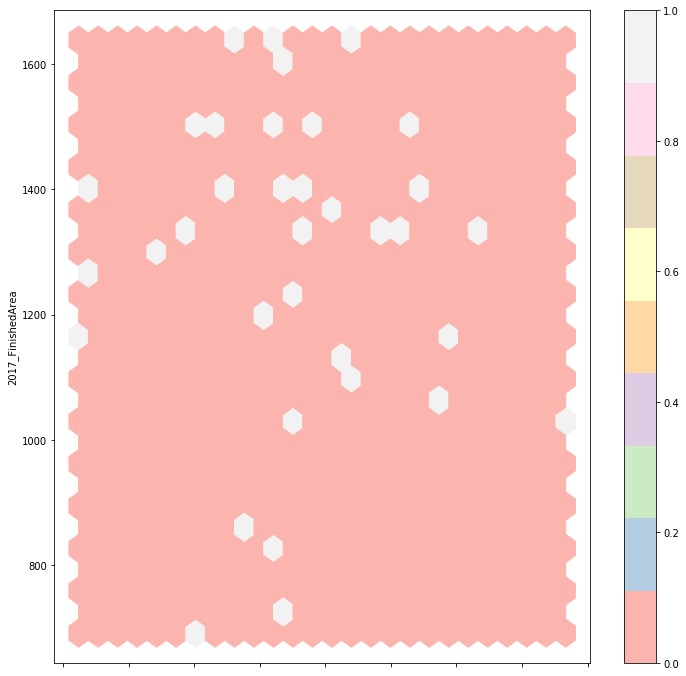

In [42]:
aff_cds.plot.hexbin(x='2017 TOTAL APPR',y='2017_FinishedArea', figsize =(12,12),gridsize = 25, cmap ='Pastel1')

In [43]:
# aff_cds_count = aff30.groupby('Council District',as_index=False)['2009 TOTAL APPR','2013 TOTAL APPR','2017 TOTAL APPR'].agg('count')
# aff_cds_count.count
# #.set_index('Council District').sort_values(ascending = False, by='Council District')

In [44]:
# aff30[['Council District', '2009 TOTAL APPR', '2013 TOTAL APPR',
#        '2017 TOTAL APPR','Pct_Change_2009_2013','Pct_Change_2013_2017','Pct_Change_2009_2017']].groupby(['Council District']).agg(['mean', 'count'])

In [45]:
aff_cds.describe()

Council District  2009 TOTAL APPR  2013 TOTAL APPR  2017 TOTAL APPR  \
count         35.000000        35.000000        35.000000        35.000000   
mean          18.000000    115280.771429    108893.057143    155271.685714   
std           10.246951     17407.263205     15445.043082     16916.980353   
min            1.000000     76783.000000     72064.000000    122379.000000   
25%            9.500000    103356.000000     98519.000000    145047.500000   
50%           18.000000    117242.000000    109607.000000    153565.000000   
75%           26.500000    127059.500000    118554.500000    164353.500000   
max           35.000000    148328.000000    141138.000000    196661.000000   

       Pct_Change_2009_2013  Pct_Change_2013_2017  Pct_Change_2009_2017  \
count             35.000000             35.000000             35.000000   
mean              -4.171429             47.285714             40.457143   
std                4.895891             19.541165             23.781286   
min              -14.000000             27.000000             20.000000   
25%               -6.500000             35.000000             26.500000   
50%               -5.000000             40.000000             30.000000   
75%               -1.500000             50.500000             42.500000   
max               11.000000            115.000000            109.000000   

       2017_FinishedArea  
count          35.000000  
mean         1282.314286  
std           250.013385  
min           692.000000  
25%          1139.500000  
50%          1346.000000  
75%          1456.500000  
max          1638.000000

In [46]:
aff_cds.iplot(kind = 'scatter',x = 'Council District', y = ['Pct_Change_2009_2013','Pct_Change_2013_2017','Pct_Change_2009_2017'],
              xTitle='Council District',yTitle='Pct_Change_2009_2013',title='Percentage Change in affordable Housing in Each council district', ticks='outside')


In [47]:
aff_cds.iplot(kind='box', x = 'Council District', y = ['2009 TOTAL APPR','2013 TOTAL APPR','2017 TOTAL APPR'])

In [48]:
aff_cds.sort_values(ascending = False, by = 'Pct_Change_2009_2013').nlargest(10,"Pct_Change_2009_2017")

Council District  2009 TOTAL APPR  2013 TOTAL APPR  2017 TOTAL APPR  \
4                  5            80311            79354           163001   
5                  6           101594           111661           196661   
6                  7           102434           104507           178619   
16                17            94787            97327           154904   
18                19            93246            88706           146860   
19                20           100282            98465           163850   
20                21            76783            72064           122379   
15                16           104462           100626           155209   
7                  8           113116           107437           156698   
17                18           105465            98352           140906   

    Pct_Change_2009_2013  Pct_Change_2013_2017  Pct_Change_2009_2017  \
4                     -1                   115                   109   
5                     11                    86                   107   
6                      3                    77                    81   
16                     5                    66                    75   
18                     2                    70                    70   
19                    -1                    75                    70   
20                    -5                    80                    69   
15                    -3                    57                    51   
7                     -4                    50                    43   
17                    -5                    49                    42   

    2017_FinishedArea  
4                1117  
5                1028  
6                1162  
16               1048  
18                863  
19               1114  
20               1182  
15               1247  
7                1351  
17                692

In [49]:

# color = ['blue','yellow','green','purple', 'red','violet','pink', 'black',
#          'lightgrey','orange', 'blue','yellow','Cyan','green','purple', 
#          'violet','pink', 'black','lightgrey','orange','red','violet','pink', 
#          'black','lightgrey','orange', 'blue','orange','red','violet','pink', 
#          'black','lightgrey','orange', 'blue']

# aff_cds.iplot(kind = 'bubble', x='Council District',y='Pct_Change_2009_2013'
#               ,size = 'Pct_Change_2009_2017', xTitle='Council District',yTitle='Pct_Change_2009_2013',
#               title='Percentage Change in affordable Housing from 2009 - 2013 in each council district', 
#               ticks='outside', color = color, text = ['2009 TOTAL APPR','2013 TOTAL APPR','Council District'])
# aff_cds.iplot(kind = 'bubble', x='Council District',y='Pct_Change_2013_2017'
#               ,size = 'Pct_Change_2009_2017', xTitle='Council District',yTitle='Pct_Change_2013_2017',
#               title='Percentage Change in affordable Housing from 2013 - 2017 in each council district', 
#               ticks='outside',color = color,text = ['2013 TOTAL APPR','2017 TOTAL APPR','Council District'])
# aff_cds.iplot(kind = 'bubble', x='Council District',y='Pct_Change_2009_2017'
#               ,size = 'Pct_Change_2009_2017', xTitle='Council District',yTitle='Pct_Change_2009_2017',
#               title= 'Percentage Change in affordable Housing from 2009 - 2017 in each council district', 
#               ticks='outside',color = color,text = ['2009 TOTAL APPR','2017 TOTAL APPR','Council District'])

In [50]:
affcity = aff30.groupby('AddressCity',as_index=False)['2009 TOTAL APPR', '2013 TOTAL APPR','2017 TOTAL APPR','Pct_Change_2009_2013','Pct_Change_2013_2017','Pct_Change_2009_2017'].mean().round(decimals = 0)
#aff2009['AddressPostalCode'] = pd.to_numeric(aff2009['AddressPostalCode'])
affcity.set_index('AddressCity')

2009 TOTAL APPR  2013 TOTAL APPR  2017 TOTAL APPR  \
AddressCity                                                         
ANTIOCH                126138.0         115968.0         158295.0   
ASHLAND CITY           105622.0         103451.0         133593.0   
BELLEVUE               148000.0         154900.0         221900.0   
BRENTWOOD              143538.0         140792.0         184941.0   
GOODLETTSVILLE         134679.0         129685.0         162533.0   
HERMITAGE              127332.0         121387.0         157333.0   
JOELTON                128832.0         127834.0         159112.0   
LAVERGNE               111700.0         149300.0         169800.0   
MADISON                111526.0         104118.0         139570.0   
MOUNT JULIET           134754.0         129493.0         168550.0   
NASHVILLE              109434.0         103482.0         152260.0   
NOLENSVILLE            139956.0         133544.0         188400.0   
OLD HICKORY            117843.0         114526.0         152133.0   
PEGRAM                 136477.0         130027.0         154548.0   
WHITES CREEK           119105.0         114600.0         144796.0   

                Pct_Change_2009_2013  Pct_Change_2013_2017  \
AddressCity                                                  
ANTIOCH                         -7.0                  38.0   
ASHLAND CITY                    -1.0                  31.0   
BELLEVUE                         5.0                  43.0   
BRENTWOOD                        1.0                  33.0   
GOODLETTSVILLE                  -3.0                  26.0   
HERMITAGE                       -4.0                  31.0   
JOELTON                          1.0                  25.0   
LAVERGNE                        34.0                  14.0   
MADISON                         -6.0                  36.0   
MOUNT JULIET                    -3.0                  30.0   
NASHVILLE                       -5.0                  52.0   
NOLENSVILLE                     10.0                  41.0   
OLD HICKORY                     -2.0                  35.0   
PEGRAM                          -5.0                  19.0   
WHITES CREEK                    -1.0                  29.0   

                Pct_Change_2009_2017  
AddressCity                           
ANTIOCH                         27.0  
ASHLAND CITY                    30.0  
BELLEVUE                        50.0  
BRENTWOOD                       32.0  
GOODLETTSVILLE                  22.0  
HERMITAGE                       25.0  
JOELTON                         26.0  
LAVERGNE                        52.0  
MADISON                         27.0  
MOUNT JULIET                    26.0  
NASHVILLE                       45.0  
NOLENSVILLE                     58.0  
OLD HICKORY                     32.0  
PEGRAM                          13.0  
WHITES CREEK                    27.0

In [51]:
# color = ['blue','yellow','green','purple', 'red','violet','pink', 'black',
#          'lightgrey','orange', 'lightgrey','orange','violet','grey']
# affcity.iplot(kind = 'bubble', x='AddressCity',y='Pct_Change_2009_2013',size = 'Pct_Change_2009_2013',
#              xTitle='',yTitle='Pct_Change_2009_2013',color=color,
#                   title='Percentage Change in affordable Housing 2009-2013 by City', 
#               ticks='outside',text = ['2009 TOTAL APPR','2013 TOTAL APPR','AddressCity'])
# affcity.iplot(kind = 'bubble', x='AddressCity',y='Pct_Change_2013_2017',size = 'Pct_Change_2013_2017',
#              xTitle='',yTitle='Pct_Change_2013_2017',color=color,
#                   title='Percentage Change in affordable Housing 2013-2017 by City', ticks='outside',
#               text = ['2013 TOTAL APPR','2017 TOTAL APPR','AddressCity'])
# affcity.iplot(kind = 'bubble', x='AddressCity',y='Pct_Change_2009_2017',size = 'Pct_Change_2009_2017',
#              xTitle='',yTitle='Pct_Change_2009_2017',color=color,
#                   title='Percentage Change in affordable Housing 2009-2017  by City', ticks='outside',
#                           text = ['2013 TOTAL APPR','2017 TOTAL APPR','AddressCity'])


In [52]:
workforce_aff= final_sf[(final_sf['Mortgage_Per_Year_2009'] < 64900*1.2*.3) & (final_sf['Mortgage_Per_Year_2009'] > 64900*.6*.3)
                       & (final_sf['Mortgage_Per_Year_2013'] < 62300*1.2*.3) & (final_sf['Mortgage_Per_Year_2013'] > 62300*.6*.3)
                       & (final_sf['Mortgage_Per_Year_2017'] < 68000*1.2*.3) & (final_sf['Mortgage_Per_Year_2017'] > 68000*.6*.3)]

In [53]:
print(workforce_aff.shape)

(24479, 28)


In [54]:
print(aff30.shape)

(102156, 28)


In [55]:
# tax_2016 = pd.read_csv('/Users/hari/Data/2016tax.csv')
# tax_2016.head()

In [56]:
#tax_2016.loc[tax_2016.STATE=='TN']

In [57]:
print(68000*1.2*.3)

24480.0


In [58]:
workforce_cds = workforce_aff.groupby('Council District',as_index=False)['2009 TOTAL APPR', '2013 TOTAL APPR','2017 TOTAL APPR','Pct_Change_2009_2013','Pct_Change_2013_2017','Pct_Change_2009_2017'].mean().round(decimals = 0).apply(np.int64)
workforce_cds['Council District'] = pd.to_numeric(workforce_cds['Council District'])
workforce_cds.sort_values(ascending = False, by = 'Pct_Change_2009_2017')
workforce_cds.head()

Council District  2009 TOTAL APPR  2013 TOTAL APPR  2017 TOTAL APPR  \
0                 1           267187           266832           331286   
1                 2           256958           251454           311908   
2                 3           268754           261226           317036   
3                 4           294459           289310           365088   
4                 5           237785           244105           383879   

   Pct_Change_2009_2013  Pct_Change_2013_2017  Pct_Change_2009_2017  
0                     0                    25                    24  
1                    -2                    25                    22  
2                    -2                    22                    19  
3                    -2                    27                    25  
4                     3                    58                    62

In [59]:
workforce_cds.describe()

Council District  2009 TOTAL APPR  2013 TOTAL APPR  2017 TOTAL APPR  \
count         35.000000        35.000000        35.000000        35.000000   
mean          18.000000    267552.285714    261080.685714    339011.257143   
std           10.246951     15616.135365     16867.256810     27109.664745   
min            1.000000    237785.000000    224568.000000    294953.000000   
25%            9.500000    257624.000000    249997.000000    316761.500000   
50%           18.000000    266762.000000    261226.000000    338167.000000   
75%           26.500000    275871.500000    271874.000000    363830.000000   
max           35.000000    306251.000000    301035.000000    385714.000000   

       Pct_Change_2009_2013  Pct_Change_2013_2017  Pct_Change_2009_2017  
count             35.000000             35.000000             35.000000  
mean              -2.028571             30.571429             27.771429  
std                4.435722              8.099694             11.941243  
min              -13.000000             19.000000              8.000000  
25%               -4.000000             25.500000             19.500000  
50%               -2.000000             29.000000             25.000000  
75%                0.500000             33.500000             34.000000  
max               10.000000             58.000000             62.000000

In [60]:
aff_drop = aff_cds.drop(['Council District','Pct_Change_2009_2013','Pct_Change_2013_2017','Pct_Change_2009_2017'], axis = 1)
work_drop = workforce_cds.drop(['Council District','Pct_Change_2009_2013','Pct_Change_2013_2017','Pct_Change_2009_2017'], axis = 1)
aff_drop.head()

2009 TOTAL APPR  2013 TOTAL APPR  2017 TOTAL APPR  2017_FinishedArea
0           112597           106515           140966               1499
1           100307            85776           124216               1383
2           117242           108253           142950               1511
3           146038           141138           183584               1318
4            80311            79354           163001               1117

In [61]:
aff_drop.iplot(kind='box', boxpoints ='outliers', yTitle='Appraisal Value',
              title='Affordable Housing (30% of AMI) in each council district based on Appraisal', 
              ticks='outside', text = ['2009 TOTAL APPR','2013 TOTAL APPR','Council District'])
work_drop.iplot(kind='box',boxpoints ='outliers',yTitle='Appraisal Value',
                title='WorkForce Housing (30% of AMI) in each council district based on Appraisal', 
              ticks='outside', text = ['2009 TOTAL APPR','2017 TOTAL APPR','Council District'])

In [62]:
# color = ['blue','yellow','green','purple', 'red','violet','pink', 'black',
#          'lightgrey','orange', 'blue','yellow','Cyan','green','purple', 
#          'violet','pink', 'black','lightgrey','orange','red','violet','pink', 
#          'black','lightgrey','orange', 'blue','orange','red','violet','pink', 
#          'black','lightgrey','orange', 'blue']

# workforce_cds.iplot(kind = 'bubble', x='Council District',y='Pct_Change_2009_2013'
#               ,size = 'Pct_Change_2009_2017', xTitle='Council District',yTitle='Pct_Change_2009_2013',
#               title='Percentage Change in work force Housing  2009 - 2013 in each council district based on Appraisal', 
#               ticks='outside', color = color, text = ['2009 TOTAL APPR','2013 TOTAL APPR','Council District'])
# workforce_cds.iplot(kind = 'bubble', x='Council District',y='Pct_Change_2013_2017'
#               ,size = 'Pct_Change_2009_2017', xTitle='Council District',yTitle='Pct_Change_2013_2017',
#               title='Percentage Change in work force Housing from 2013 - 2017 in each council district based on Appraisal', 
#               ticks='outside',color = color,text = ['2013 TOTAL APPR','2017 TOTAL APPR','Council District'])
# workforce_cds.iplot(kind = 'bubble', x='Council District',y='Pct_Change_2009_2017'
#               ,size = 'Pct_Change_2009_2017', xTitle='Council District',yTitle='Pct_Change_2009_2017',
#               title= 'Percentage Change in work force Housing from 2009 - 2017 in each council district based on Appraisal', 
#               ticks='outside',color = color,text = ['2009 TOTAL APPR','2017 TOTAL APPR','Council District'])

In [63]:
workforcecity = workforce_aff.groupby('AddressCity',as_index=False)['2009 TOTAL APPR', '2013 TOTAL APPR','2017 TOTAL APPR','Pct_Change_2009_2013','Pct_Change_2013_2017','Pct_Change_2009_2017'].mean().round(decimals = 0)
#aff2009['AddressPostalCode'] = pd.to_numeric(aff2009['AddressPostalCode'])
affcity.set_index('AddressCity')

2009 TOTAL APPR  2013 TOTAL APPR  2017 TOTAL APPR  \
AddressCity                                                         
ANTIOCH                126138.0         115968.0         158295.0   
ASHLAND CITY           105622.0         103451.0         133593.0   
BELLEVUE               148000.0         154900.0         221900.0   
BRENTWOOD              143538.0         140792.0         184941.0   
GOODLETTSVILLE         134679.0         129685.0         162533.0   
HERMITAGE              127332.0         121387.0         157333.0   
JOELTON                128832.0         127834.0         159112.0   
LAVERGNE               111700.0         149300.0         169800.0   
MADISON                111526.0         104118.0         139570.0   
MOUNT JULIET           134754.0         129493.0         168550.0   
NASHVILLE              109434.0         103482.0         152260.0   
NOLENSVILLE            139956.0         133544.0         188400.0   
OLD HICKORY            117843.0         114526.0         152133.0   
PEGRAM                 136477.0         130027.0         154548.0   
WHITES CREEK           119105.0         114600.0         144796.0   

                Pct_Change_2009_2013  Pct_Change_2013_2017  \
AddressCity                                                  
ANTIOCH                         -7.0                  38.0   
ASHLAND CITY                    -1.0                  31.0   
BELLEVUE                         5.0                  43.0   
BRENTWOOD                        1.0                  33.0   
GOODLETTSVILLE                  -3.0                  26.0   
HERMITAGE                       -4.0                  31.0   
JOELTON                          1.0                  25.0   
LAVERGNE                        34.0                  14.0   
MADISON                         -6.0                  36.0   
MOUNT JULIET                    -3.0                  30.0   
NASHVILLE                       -5.0                  52.0   
NOLENSVILLE                     10.0                  41.0   
OLD HICKORY                     -2.0                  35.0   
PEGRAM                          -5.0                  19.0   
WHITES CREEK                    -1.0                  29.0   

                Pct_Change_2009_2017  
AddressCity                           
ANTIOCH                         27.0  
ASHLAND CITY                    30.0  
BELLEVUE                        50.0  
BRENTWOOD                       32.0  
GOODLETTSVILLE                  22.0  
HERMITAGE                       25.0  
JOELTON                         26.0  
LAVERGNE                        52.0  
MADISON                         27.0  
MOUNT JULIET                    26.0  
NASHVILLE                       45.0  
NOLENSVILLE                     58.0  
OLD HICKORY                     32.0  
PEGRAM                          13.0  
WHITES CREEK                    27.0

In [64]:
#workforcecity.sort_values(ascending = False, by = 'Pct_Change_2009_2017')

In [65]:
# color = ['blue','yellow','green','purple', 'red','violet','pink', 'black',
#          'lightgrey','orange', 'lightgrey','orange','violet']
# workforcecity.iplot(kind = 'bubble', x='AddressCity',y='Pct_Change_2009_2013',size = 'Pct_Change_2009_2013',
#              xTitle='',yTitle='Pct_Change_2009_2013',color=color,
#                   title='Percentage Change in workforce Housing 2009-2013 by City', 
#               ticks='outside',text = ['2009 TOTAL APPR','2013 TOTAL APPR','AddressCity'])
# workforcecity.iplot(kind = 'bubble', x='AddressCity',y='Pct_Change_2013_2017',size = 'Pct_Change_2013_2017',
#              xTitle='',yTitle='Pct_Change_2013_2017',color=color,
#                   title='Percentage Change in workforce Housing 2013-2017 by City', ticks='outside',
#               text = ['2013 TOTAL APPR','2017 TOTAL APPR','AddressCity'])
# workforcecity.iplot(kind = 'bubble', x='AddressCity',y='Pct_Change_2009_2017',size = 'Pct_Change_2009_2017',
#              xTitle='',yTitle='Pct_Change_2009_2017',color=color,
#                title='Percentage Change in workforce Housing 2009-2017  by City', ticks='outside',
#                           text = ['2013 TOTAL APPR','2017 TOTAL APPR','AddressCity'])


In [66]:
aff_geo = gpd.read_file('/Users/hari/Data/Council District Outlines (GIS).geojson')
aff_geo['district'] = pd.to_numeric(aff_geo['district'])

In [67]:
aff_cds.columns

Index(['Council District', '2009 TOTAL APPR', '2013 TOTAL APPR',
       '2017 TOTAL APPR', 'Pct_Change_2009_2013', 'Pct_Change_2013_2017',
       'Pct_Change_2009_2017', '2017_FinishedArea'],
      dtype='object')

In [68]:
merged = pd.merge(aff_geo,
                  aff_cds, left_on ='district', right_on ='Council District')

In [69]:
merged.drop(['district'], axis = 1, inplace = True)

In [70]:
merged.columns

Index(['first_name', 'email', 'res_phone', 'bus_phone', 'last_name',
       'position', 'geometry', 'Council District', '2009 TOTAL APPR',
       '2013 TOTAL APPR', '2017 TOTAL APPR', 'Pct_Change_2009_2013',
       'Pct_Change_2013_2017', 'Pct_Change_2009_2017', '2017_FinishedArea'],
      dtype='object')

In [71]:
merged.sort_values(ascending = False, by ='Pct_Change_2009_2017').head()

first_name                              email     res_phone  \
12         Scott          scott.davis@nashville.gov  615-554-9730   
13         Brett        brett.withers@nashville.gov  615-427-5946   
14       Anthony        anthony.davis@nashville.gov  615-775-8746   
17         Colby         colby.sledge@nashville.gov  615-442-3727   
23  Mary Carolyn  marycarolyn.roberts@nashville.gov  615-977-9262   

       bus_phone last_name        position  \
12  615-862-6780     Davis  Council Member   
13  615-862-6780   Withers  Council Member   
14  615-862-6780     Davis  Council Member   
17  615-862-6780    Sledge  Council Member   
23  615-862-6780   Roberts  Council Member   

                                             geometry  Council District  \
12  (POLYGON ((-86.74724499986961 36.2104139998539...                 5   
13  (POLYGON ((-86.69742962178249 36.2005979588793...                 6   
14  (POLYGON ((-86.71023799985292 36.2558440002726...                 7   
17  (POLYGON ((-86.76351199989064 36.1492309997191...                17   
23  (POLYGON ((-86.89685899975811 36.2070420002310...                20   

    2009 TOTAL APPR  2013 TOTAL APPR  2017 TOTAL APPR  Pct_Change_2009_2013  \
12            80311            79354           163001                    -1   
13           101594           111661           196661                    11   
14           102434           104507           178619                     3   
17            94787            97327           154904                     5   
23           100282            98465           163850                    -1   

    Pct_Change_2013_2017  Pct_Change_2009_2017  2017_FinishedArea  
12                   115                   109               1117  
13                    86                   107               1028  
14                    77                    81               1162  
17                    66                    75               1048  
23                    75                    70               1114

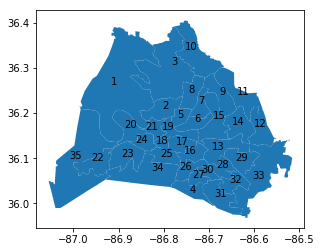

In [72]:
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
merged.plot()
for idx, row in merged.iterrows():
    plt.annotate(s=row['Council District'], xy=row['coords'],
                 horizontalalignment='center')
# ax= merged.plot()
# merged.apply(lambda x: ax.annotate(s=x['Council District'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

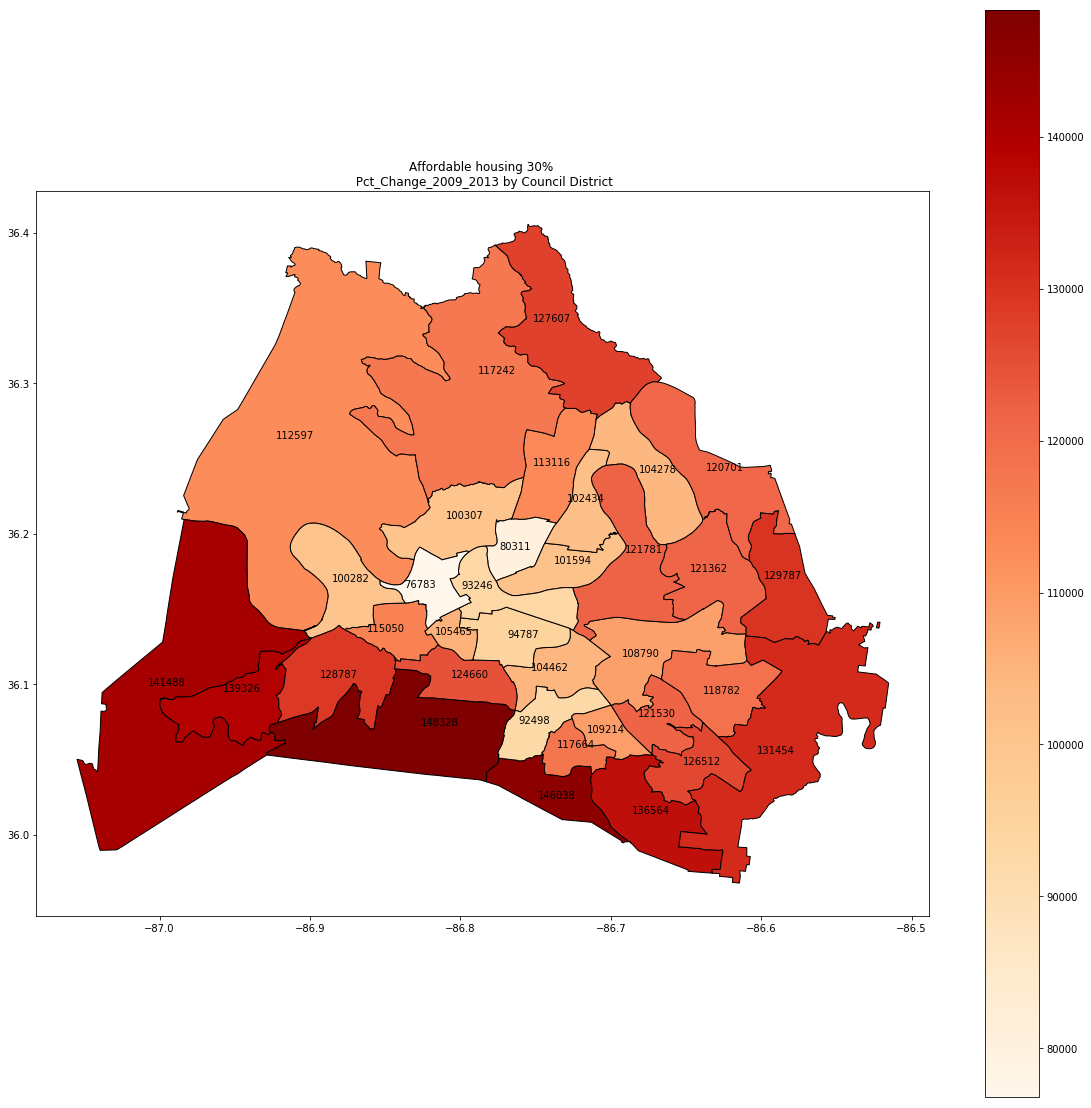

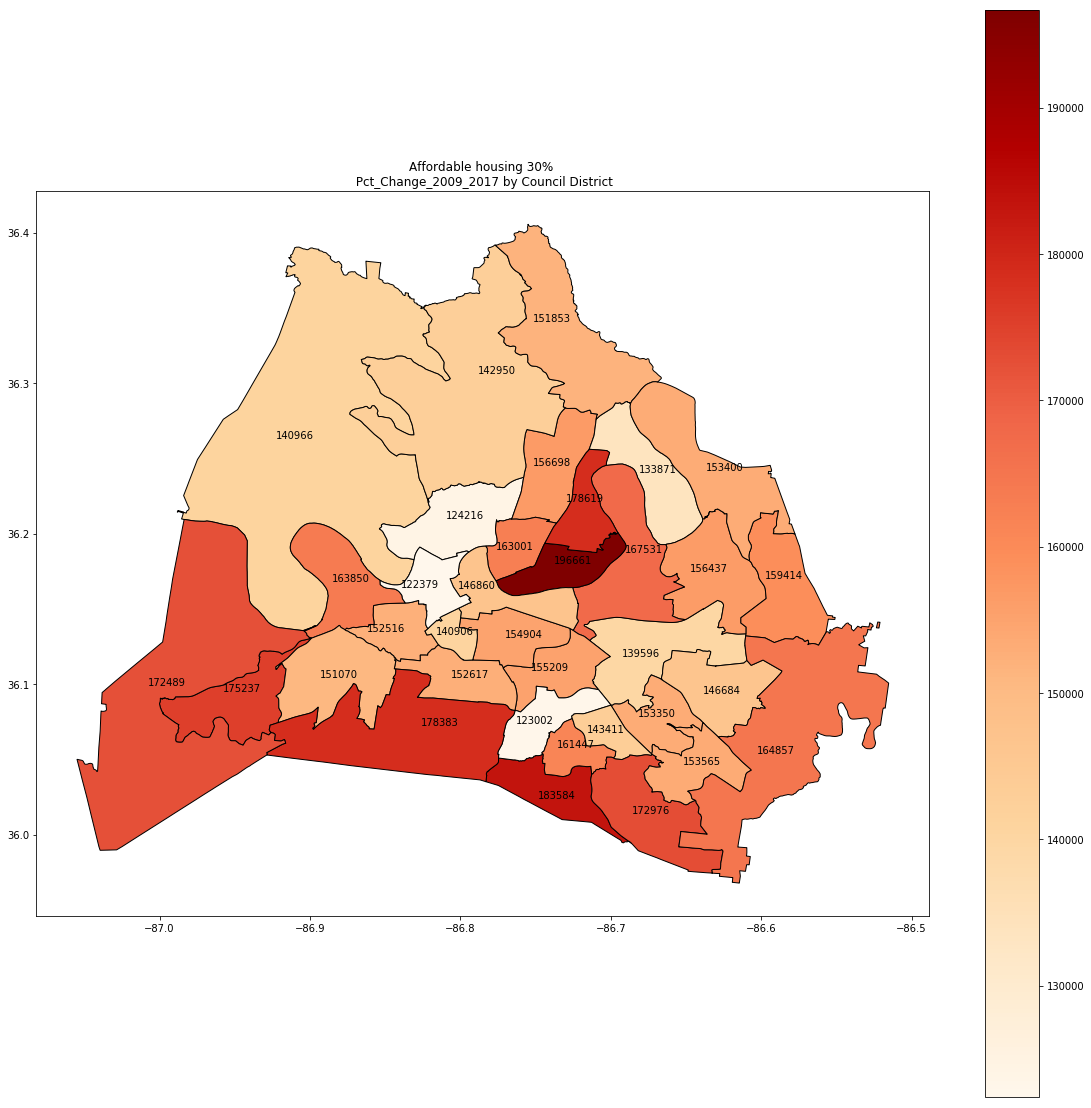

In [73]:
leg_kwds = {'title': 'Council District', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}
merged.plot(column = '2009 TOTAL APPR', figsize=(20,20),cmap='OrRd', edgecolor = 'black',legend = True,legend_kwds = leg_kwds)
plt.title("Affordable housing 30% \n Pct_Change_2009_2013 by Council District")
for idx, row in merged.iterrows():
    plt.annotate(s=row['2009 TOTAL APPR'], xy=row['coords'],
                 horizontalalignment='center')


leg_kwds = {'title': 'Council District', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}
merged.plot(column = '2017 TOTAL APPR', figsize=(20,20), cmap='OrRd',edgecolor = 'black',legend = True,legend_kwds = leg_kwds)
plt.title("Affordable housing 30% \n Pct_Change_2009_2017 by Council District")
for idx, row in merged.iterrows():
    plt.annotate(s=row['2017 TOTAL APPR'], xy=row['coords'],
                 horizontalalignment='center')

## Affordable and Workforce Housing counts based on 2009, 2013, and 2017 AMI and mortgage income.


In [74]:
final_sf.columns

Index(['AddressFullAddress', '2009 LAND', '2009 IMPR', '2009 TOTAL APPR',
       '2009 TOTAL ASSD', '2009_FinishedArea', '2013 LAND', '2013 IMPR',
       '2013 TOTAL APPR', '2013 TOTAL ASSD', '2013_FinishedArea', '2017 LAND',
       '2017 IMPR', '2017 TOTAL APPR', '2017 TOTAL ASSD', '2017_FinishedArea',
       '_merge', 'APN', 'DistrictCode', 'Council District', 'AddressCity',
       'AddressPostalCode', 'Pct_Change_2009_2013', 'Pct_Change_2013_2017',
       'Pct_Change_2009_2017', 'Mortgage_Per_Year_2009',
       'Mortgage_Per_Year_2013', 'Mortgage_Per_Year_2017'],
      dtype='object')

## Per district housing count

In [75]:
aff_2009 = final_sf.loc[final_sf.Mortgage_Per_Year_2009 < 64900*.6*.3].groupby('Council District').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2009'}).reset_index()

aff_2013 = final_sf.loc[final_sf.Mortgage_Per_Year_2013 < 62300*.6*.3].groupby('Council District').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2013'}).reset_index()

aff_2017 = final_sf.loc[final_sf.Mortgage_Per_Year_2017 < 68000*.6*.3].groupby('Council District').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2017'}).reset_index()

aff_per_district = pd.merge(pd.merge(aff_2009, aff_2013), aff_2017)

aff_per_district['Change_2009_2013'] = aff_per_district.count_2013 - aff_per_district.count_2009
aff_per_district['Change_2013_2017'] = aff_per_district.count_2017 - aff_per_district.count_2013
aff_per_district['Change_2009_2017'] = aff_per_district.count_2017 - aff_per_district.count_2009

aff_per_district['Pct_Change_2009_2013'] = (aff_per_district.count_2013 - aff_per_district.count_2009) / aff_per_district.count_2009*100
aff_per_district['Pct_Change_2013_2017'] = (aff_per_district.count_2017 - aff_per_district.count_2013) / aff_per_district.count_2013*100
aff_per_district['Pct_Change_2009_2017'] = (aff_per_district.count_2017 - aff_per_district.count_2009) / aff_per_district.count_2009*100

## Per city Affordable housing count

In [76]:
aff_2009_city = final_sf.loc[final_sf.Mortgage_Per_Year_2009 < 64900*.6*.3].groupby('AddressCity').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2009'}).reset_index()

aff_2013_city = final_sf.loc[final_sf.Mortgage_Per_Year_2013 < 62300*.6*.3].groupby('AddressCity').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2013'}).reset_index()

aff_2017_city= final_sf.loc[final_sf.Mortgage_Per_Year_2017 < 68000*.6*.3].groupby('AddressCity').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2017'}).reset_index()

aff_per_city = pd.merge(pd.merge(aff_2009_city, aff_2013_city), aff_2017_city)

aff_per_city['Change_2009_2013'] = aff_per_city.count_2013 - aff_per_city.count_2009
aff_per_city['Change_2013_2017'] = aff_per_city.count_2017 - aff_per_city.count_2013
aff_per_city['Change_2009_2017'] = aff_per_city.count_2017 - aff_per_city.count_2009

aff_per_city['Pct_Change_2009_2013'] = (aff_per_city.count_2013 - aff_per_city.count_2009) / aff_per_city.count_2009*100
aff_per_city['Pct_Change_2013_2017'] = (aff_per_city.count_2017 - aff_per_city.count_2013) / aff_per_city.count_2013*100
aff_per_city['Pct_Change_2009_2017'] = (aff_per_city.count_2017 - aff_per_city.count_2009) / aff_per_city.count_2009*100

In [77]:
df1 = affcity.rename(columns = {'Pct_Change_2009_2013':'Pct_Change_APPR_2009_2013','Pct_Change_2013_2017':'Pct_Change_APPR_2023_2017','Pct_Change_2009_2017':'Pct_Change_APPR_2009_2017'})
aff_city =pd.merge(aff_per_city, df1, left_on ='AddressCity', right_on ='AddressCity').round(decimals = 1)
aff_city.head()

AddressCity  count_2009  count_2013  count_2017  Change_2009_2013  \
0         ANTIOCH       18625       19580       19313               955   
1    ASHLAND CITY         144         140         126                -4   
2        BELLEVUE           2           2           1                 0   
3       BRENTWOOD        1223        1198         735               -25   
4  GOODLETTSVILLE        3544        3444        3138              -100   

   Change_2013_2017  Change_2009_2017  Pct_Change_2009_2013  \
0              -267               688                   5.1   
1               -14               -18                  -2.8   
2                -1                -1                   0.0   
3              -463              -488                  -2.0   
4              -306              -406                  -2.8   

   Pct_Change_2013_2017  Pct_Change_2009_2017  2009 TOTAL APPR  \
0                  -1.4                   3.7         126138.0   
1                 -10.0                 -12.5         105622.0   
2                 -50.0                 -50.0         148000.0   
3                 -38.6                 -39.9         143538.0   
4                  -8.9                 -11.5         134679.0   

   2013 TOTAL APPR  2017 TOTAL APPR  Pct_Change_APPR_2009_2013  \
0         115968.0         158295.0                       -7.0   
1         103451.0         133593.0                       -1.0   
2         154900.0         221900.0                        5.0   
3         140792.0         184941.0                        1.0   
4         129685.0         162533.0                       -3.0   

   Pct_Change_APPR_2023_2017  Pct_Change_APPR_2009_2017  
0                       38.0                       27.0  
1                       31.0                       30.0  
2                       43.0                       50.0  
3                       33.0                       32.0  
4                       26.0                       22.0


## Per District workforce housing count

In [78]:
workforce_2009 = final_sf.loc[(final_sf['Mortgage_Per_Year_2009'] < 64900*1.2*.3) & (final_sf['Mortgage_Per_Year_2009'] > 64900*.6*.3)] \
.groupby('Council District').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2009'}).reset_index()
workforce_2013 = final_sf.loc[(final_sf['Mortgage_Per_Year_2013'] < 62300*1.2*.3) & (final_sf['Mortgage_Per_Year_2013'] > 62300*.6*.3)] \
.groupby('Council District').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2013'}).reset_index()
workforce_2017= final_sf.loc[(final_sf['Mortgage_Per_Year_2017'] < 68000*1.2*.3) & (final_sf['Mortgage_Per_Year_2017'] > 68000*.6*.3)] \
.groupby('Council District').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2017'}).reset_index()

workforce_per_district = pd.merge(pd.merge(workforce_2009, workforce_2013), workforce_2017)
workforce_per_district['Change_2009_2013'] = workforce_per_district.count_2013 - workforce_per_district.count_2009
workforce_per_district['Change_2013_2017'] = workforce_per_district.count_2017 - workforce_per_district.count_2013
workforce_per_district['Change_2009_2017'] = workforce_per_district.count_2017 - workforce_per_district.count_2009


workforce_per_district['Pct_Change_2009_2013'] = (workforce_per_district.count_2013 - workforce_per_district.count_2009) / workforce_per_district.count_2009*100
workforce_per_district['Pct_Change_2013_2017'] = (workforce_per_district.count_2017 - workforce_per_district.count_2013) / workforce_per_district.count_2013*100
workforce_per_district['Pct_Change_2009_2017'] = (workforce_per_district.count_2017 - workforce_per_district.count_2009) / workforce_per_district.count_2009*100

## Per City workforce housing count

In [79]:
workforce_2009_city = final_sf.loc[(final_sf['Mortgage_Per_Year_2009'] < 64900*1.2*.3) & (final_sf['Mortgage_Per_Year_2009'] > 64900*.6*.3)] \
.groupby('AddressCity').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2009'}).reset_index()
workforce_2013_city = final_sf.loc[(final_sf['Mortgage_Per_Year_2013'] < 62300*1.2*.3) & (final_sf['Mortgage_Per_Year_2013'] > 62300*.6*.3)] \
.groupby('AddressCity').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2013'}).reset_index()
workforce_2017_city= final_sf.loc[(final_sf['Mortgage_Per_Year_2017'] < 68000*1.2*.3) & (final_sf['Mortgage_Per_Year_2017'] > 68000*.6*.3)] \
.groupby('AddressCity').AddressFullAddress.count().to_frame().rename(columns = {'AddressFullAddress': 'count_2017'}).reset_index()

workforce_per_city = pd.merge(pd.merge(workforce_2009_city, workforce_2013_city), workforce_2017_city)
workforce_per_city['Change_2009_2013'] = workforce_per_city.count_2013 - workforce_per_city.count_2009
workforce_per_city['Change_2013_2017'] = workforce_per_city.count_2017 - workforce_per_city.count_2013
workforce_per_city['Change_2009_2017'] = workforce_per_city.count_2017 - workforce_per_city.count_2009


workforce_per_city['Pct_Change_2009_2013'] = (workforce_per_city.count_2013 - workforce_per_city.count_2009) / workforce_per_city.count_2009*100
workforce_per_city['Pct_Change_2013_2017'] = (workforce_per_city.count_2017 - workforce_per_city.count_2013) / workforce_per_city.count_2013*100
workforce_per_city['Pct_Change_2009_2017'] = (workforce_per_city.count_2017 - workforce_per_city.count_2009) / workforce_per_city.count_2009*100

In [80]:
workforce_per_city

AddressCity  count_2009  count_2013  count_2017  Change_2009_2013  \
0          ANTIOCH        1292        1058        3314              -234   
1     ASHLAND CITY          16          20          30                 4   
2        BRENTWOOD        2814        2941        3266               127   
3         FRANKLIN          13          11          12                -2   
4   GOODLETTSVILLE         710         820        1219               110   
5        HERMITAGE        1379        1676        3290               297   
6          JOELTON         296         322         518                26   
7         LAVERGNE           2           2           2                 0   
8          MADISON         524         448        1022               -76   
9     MOUNT JULIET          84         112         219                28   
10       NASHVILLE       27300       29456       48553              2156   
11     NOLENSVILLE         150         229         615                79   
12     OLD HICKORY         821         838        1105                17   
13          PEGRAM          53          54          73                 1   
14    WHITES CREEK         233         237         332                 4   

    Change_2013_2017  Change_2009_2017  Pct_Change_2009_2013  \
0               2256              2022            -18.111455   
1                 10                14             25.000000   
2                325               452              4.513149   
3                  1                -1            -15.384615   
4                399               509             15.492958   
5               1614              1911             21.537346   
6                196               222              8.783784   
7                  0                 0              0.000000   
8                574               498            -14.503817   
9                107               135             33.333333   
10             19097             21253              7.897436   
11               386               465             52.666667   
12               267               284              2.070646   
13                19                20              1.886792   
14                95                99              1.716738   

    Pct_Change_2013_2017  Pct_Change_2009_2017  
0             213.232514            156.501548  
1              50.000000             87.500000  
2              11.050663             16.062544  
3               9.090909             -7.692308  
4              48.658537             71.690141  
5              96.300716            138.578680  
6              60.869565             75.000000  
7               0.000000              0.000000  
8             128.125000             95.038168  
9              95.535714            160.714286  
10             64.832292             77.849817  
11            168.558952            310.000000  
12             31.861575             34.591961  
13             35.185185             37.735849  
14             40.084388             42.489270

In [81]:
df2 = workforcecity.rename(columns = {'Pct_Change_2009_2013':'Pct_Change_APPR_2009_2013','Pct_Change_2013_2017':'Pct_Change_APPR_2023_2017','Pct_Change_2009_2017':'Pct_Change_APPR_2009_2017'})
workforce_city =pd.merge(workforce_per_city, df2, left_on ='AddressCity', right_on ='AddressCity').round(decimals = 1)


In [82]:
aff_city

AddressCity  count_2009  count_2013  count_2017  Change_2009_2013  \
0          ANTIOCH       18625       19580       19313               955   
1     ASHLAND CITY         144         140         126                -4   
2         BELLEVUE           2           2           1                 0   
3        BRENTWOOD        1223        1198         735               -25   
4   GOODLETTSVILLE        3544        3444        3138              -100   
5        HERMITAGE        8175        8333        7508               158   
6          JOELTON        1168        1134         935               -34   
7         LAVERGNE           1           1           1                 0   
8          MADISON        9185        9254        8766                69   
9     MOUNT JULIET          40          44          31                 4   
10       NASHVILLE       88518       85852       64391             -2666   
11     NOLENSVILLE         105         123         152                18   
12     OLD HICKORY        4205        4200        3936                -5   
13          PEGRAM         119         117          96                -2   
14    WHITES CREEK         920         957         861                37   

    Change_2013_2017  Change_2009_2017  Pct_Change_2009_2013  \
0               -267               688                   5.1   
1                -14               -18                  -2.8   
2                 -1                -1                   0.0   
3               -463              -488                  -2.0   
4               -306              -406                  -2.8   
5               -825              -667                   1.9   
6               -199              -233                  -2.9   
7                  0                 0                   0.0   
8               -488              -419                   0.8   
9                -13                -9                  10.0   
10            -21461            -24127                  -3.0   
11                29                47                  17.1   
12              -264              -269                  -0.1   
13               -21               -23                  -1.7   
14               -96               -59                   4.0   

    Pct_Change_2013_2017  Pct_Change_2009_2017  2009 TOTAL APPR  \
0                   -1.4                   3.7         126138.0   
1                  -10.0                 -12.5         105622.0   
2                  -50.0                 -50.0         148000.0   
3                  -38.6                 -39.9         143538.0   
4                   -8.9                 -11.5         134679.0   
5                   -9.9                  -8.2         127332.0   
6                  -17.5                 -19.9         128832.0   
7                    0.0                   0.0         111700.0   
8                   -5.3                  -4.6         111526.0   
9                  -29.5                 -22.5         134754.0   
10                 -25.0                 -27.3         109434.0   
11                  23.6                  44.8         139956.0   
12                  -6.3                  -6.4         117843.0   
13                 -17.9                 -19.3         136477.0   
14                 -10.0                  -6.4         119105.0   

    2013 TOTAL APPR  2017 TOTAL APPR  Pct_Change_APPR_2009_2013  \
0          115968.0         158295.0                       -7.0   
1          103451.0         133593.0                       -1.0   
2          154900.0         221900.0                        5.0   
3          140792.0         184941.0                        1.0   
4          129685.0         162533.0                       -3.0   
5          121387.0         157333.0                       -4.0   
6          127834.0         159112.0                        1.0   
7          149300.0         169800.0                       34.0   
8          104118.0         139570.0                       -6.0   
9          129493.0   

In [83]:
workforce_city

AddressCity  count_2009  count_2013  count_2017  Change_2009_2013  \
0          ANTIOCH        1292        1058        3314              -234   
1     ASHLAND CITY          16          20          30                 4   
2        BRENTWOOD        2814        2941        3266               127   
3         FRANKLIN          13          11          12                -2   
4   GOODLETTSVILLE         710         820        1219               110   
5        HERMITAGE        1379        1676        3290               297   
6          JOELTON         296         322         518                26   
7         LAVERGNE           2           2           2                 0   
8          MADISON         524         448        1022               -76   
9     MOUNT JULIET          84         112         219                28   
10       NASHVILLE       27300       29456       48553              2156   
11     NOLENSVILLE         150         229         615                79   
12     OLD HICKORY         821         838        1105                17   
13          PEGRAM          53          54          73                 1   
14    WHITES CREEK         233         237         332                 4   

    Change_2013_2017  Change_2009_2017  Pct_Change_2009_2013  \
0               2256              2022                 -18.1   
1                 10                14                  25.0   
2                325               452                   4.5   
3                  1                -1                 -15.4   
4                399               509                  15.5   
5               1614              1911                  21.5   
6                196               222                   8.8   
7                  0                 0                   0.0   
8                574               498                 -14.5   
9                107               135                  33.3   
10             19097             21253                   7.9   
11               386               465                  52.7   
12               267               284                   2.1   
13                19                20                   1.9   
14                95                99                   1.7   

    Pct_Change_2013_2017  Pct_Change_2009_2017  2009 TOTAL APPR  \
0                  213.2                 156.5         261679.0   
1                   50.0                  87.5         266957.0   
2                   11.1                  16.1         296769.0   
3                    9.1                  -7.7         346900.0   
4                   48.7                  71.7         270684.0   
5                   96.3                 138.6         262649.0   
6                   60.9                  75.0         263927.0   
7                    0.0                   0.0         293800.0   
8                  128.1                  95.0         269806.0   
9                   95.5                 160.7         267731.0   
10                  64.8                  77.8         272861.0   
11                 168.6                 310.0         305950.0   
12                  31.9                  34.6         294631.0   
13                  35.2                  37.7         264188.0   
14                  40.1                  42.5         279388.0   

    2013 TOTAL APPR  2017 TOTAL APPR  Pct_Change_APPR_2009_2013  \
0          241103.0         301928.0                       -7.0   
1          292129.0         360579.0                        9.0   
2          292478.0         368244.0                       -1.0   
3          333229.0         398586.0                       -3.0   
4          268647.0         326085.0                       -0.0   
5          257703.0         310810.0                       -2.0   
6          263140.0         327514.0                       -0.0   
7          310400.0         324050.0                        6.0   
8          258852.0         316735.0                       -4.0   
9          244100.0   

## Bubble Iplot for Aff and workforce  housing based on city and APPR

In [84]:
color = ['blue','yellow','green','purple', 'red','Maroon','pink', 'black',
         'lightgrey','Cyan', 'Lime','orange','violet','indigo','tomato']
text = ['AddressCity','count_2009','count_2017','2009 TOTAL APPR','2017 TOTAL APPR','Pct_Change_APPR_2009_2017']


aff_city.iplot(kind = 'bubble',theme = 'white', x='AddressCity',y='Pct_Change_2009_2017',size = 'Pct_Change_2009_2017',
             xTitle='',yTitle='Percent Change from 2009 to 2017',color=color,
                  title='Affordable Housing (30% of AMI) Pct_Change_2009_2017 by City', ticks='outside',
                           text = text, hline=[1])


workforce_city.iplot(kind = 'bubble',theme = 'white', x='AddressCity',y='Pct_Change_2009_2017',size = 'Pct_Change_2009_2017',
             xTitle='',yTitle='Percent Change from 2009 to 2017',color=color,
                          title='WorkForce Housing (30% of AMI) Pct_Change_2009_2017 by Council District', ticks='outside',
                          text = text,hline=[1])
                       
                      

In [85]:
aff_per_district.sort_values(ascending=False, by = 'Pct_Change_2009_2017').round(decimals = 1)

Council District  count_2009  count_2013  count_2017  Change_2009_2013  \
31              32.0        2803        3088        3276               285   
32              33.0        6278        6551        6850               273   
13              14.0        4011        4334        4301               323   
27              28.0        4231        4323        4334                92   
8                9.0        4652        4649        4604                -3   
28              29.0        5639        5731        5574                92   
1                2.0        4260        4274        4198                14   
29              30.0        3722        3757        3651                35   
10              11.0        5832        5871        5642                39   
2                3.0        4654        4736        4485                82   
9               10.0        3929        3912        3693               -17   
12              13.0        4471        4560        4073                89   
20              21.0        3553        3549        3136                -4   
0                1.0        5168        5085        4469               -83   
15              16.0        4243        4230        3637               -13   
30              31.0        4893        5158        4117               265   
7                8.0        5026        5056        4087                30   
14              15.0        5972        5973        4828                 1   
22              23.0        1288        1269         991               -19   
11              12.0        4419        4314        3377              -105   
33              34.0         783         770         575               -13   
26              27.0        3899        4015        2777               116   
21              22.0        5147        5218        3656                71   
19              20.0        4259        4165        3022               -94   
17              18.0        1017         916         707              -101   
4                5.0        4451        4386        3011               -65   
16              17.0        2641        2267        1728              -374   
25              26.0        3982        3524        2393              -458   
24              25.0        1023        1048         576                25   
3                4.0        2174        2018        1173              -156   
6                7.0        5758        5492        2903              -266   
23              24.0        2022        1917         801              -105   
34              35.0        2544        2342         995              -202   
18              19.0        3349        2731        1216              -618   
5                6.0        3885        3154        1137              -731   

    Change_2013_2017  Change_2009_2017  Pct_Change_2009_2013  \
31               188               473                  10.2   
32               299               572                   4.3   
13               -33               290                   8.1   
27                11               103                   2.2   
8                -45               -48                  -0.1   
28              -157               -65                   1.6   
1                -76               -62                   0.3   
29              -106               -71                   0.9   
10              -229              -190                   0.7   
2               -251              -169                   1.8   
9               -219              -236                  -0.4   
12              -487              -398                   2.0   
20              -413              -417                  -0.1   
0               -616              -699                  -1.6   
15              -593              -606                  -0.3   
30             -1041              -776                   5.4   
7               -969              -939                   0.6   
14             -1145             -1144     

In [86]:
workforce_per_district.sort_values(ascending=False, by = 'Pct_Change_2009_2017')

Council District  count_2009  count_2013  count_2017  Change_2009_2013  \
4                5.0          62         145        1887                83   
15              16.0          29          32         673                 3   
19              20.0         158         221        1959                63   
26              27.0         132         181        1381                49   
6                7.0         368         641        3631               273   
29              30.0          21          22         134                 1   
28              29.0          48          45         284                -3   
13              14.0         137         200         722                63   
7                8.0         267         239        1205               -28   
14              15.0         392         447        1605                55   
1                2.0         103         106         372                 3   
31              32.0         158         101         498               -57   
21              22.0        1032        1108        3041                76   
5                6.0        1236        1925        3481               689   
30              31.0        1403        1683        3821               280   
27              28.0          70          20         183               -50   
12              13.0         249         153         634               -96   
11              12.0        1300        1543        2796               243   
32              33.0         545         396        1151              -149   
0                1.0         703         820        1470               117   
18              19.0        1465        1786        2999               321   
25              26.0        1431        1869        2817               438   
20              21.0         472         420         857               -52   
9               10.0         503         534         902                31   
16              17.0        1095        1442        1936               347   
2                3.0         632         647        1115                15   
8                9.0         176         184         293                 8   
34              35.0        3515        3940        5280               425   
10              11.0         857         880        1159                23   
3                4.0        4539        4732        5316               193   
23              24.0        3052        2997        3339               -55   
22              23.0        2624        2535        2243               -89   
24              25.0        3615        3302        2506              -313   
17              18.0        1697        1549         990              -148   
33              34.0        1602        1379         891              -223   

    Change_2013_2017  Change_2009_2017  Pct_Change_2009_2013  \
4               1742              1825            133.870968   
15               641               644             10.344828   
19              1738              1801             39.873418   
26              1200              1249             37.121212   
6               2990              3263             74.184783   
29               112               113              4.761905   
28               239               236             -6.250000   
13               522               585             45.985401   
7                966               938            -10.486891   
14              1158              1213             14.030612   
1                266               269              2.912621   
31               397               340            -36.075949   
21              1933              2009              7.364341   
5               1556              2245             55.744337   
30              2138              2418             19.957234   
27               163               113            -71.428571   
12               481               385            -38.554217   
11              1253              1496     

In [87]:
df3 = gpd.read_file('/Users/hari/Data/Zip Codes (GIS)(.geojson')



In [88]:
merged2 = pd.merge(df3,
                  aff_city, left_on ='po_name', right_on ='AddressCity')
merged3 = pd.merge(df3,
                  workforce_city, left_on ='po_name', right_on ='AddressCity')

In [89]:
merged3.head()

zip objectid    po_name      shape_stlength        shape_starea  \
0  37027       34  BRENTWOOD   3140.581074908484  595244.46435546875   
1  37027       37  BRENTWOOD  3558.4949049555025  315672.26501464844   
2  37027       51  BRENTWOOD  1229.2480510001492  38798.497680664063   
3  37027       35  BRENTWOOD  579.56645303047776     5831.7646484375   
4  37027       32  BRENTWOOD  4634.2336559087435  967278.85137939453   

                                            geometry AddressCity  count_2009  \
0  (POLYGON ((-86.684745973484 35.992792089723, -...   BRENTWOOD        2814   
1  (POLYGON ((-86.719974241412 36.009524281615, -...   BRENTWOOD        2814   
2  (POLYGON ((-86.731381448403 36.010083670813, -...   BRENTWOOD        2814   
3  (POLYGON ((-86.725638551001 36.009521500444, -...   BRENTWOOD        2814   
4  (POLYGON ((-86.680060011309 35.99132483365, -8...   BRENTWOOD        2814   

   count_2013  count_2017            ...              Change_2009_2017  \
0        2941        3266            ...                           452   
1        2941        3266            ...                           452   
2        2941        3266            ...                           452   
3        2941        3266            ...                           452   
4        2941        3266            ...                           452   

   Pct_Change_2009_2013  Pct_Change_2013_2017  Pct_Change_2009_2017  \
0                   4.5                  11.1                  16.1   
1                   4.5                  11.1                  16.1   
2                   4.5                  11.1                  16.1   
3                   4.5                  11.1                  16.1   
4                   4.5                  11.1                  16.1   

   2009 TOTAL APPR  2013 TOTAL APPR  2017 TOTAL APPR  \
0         296769.0         292478.0         368244.0   
1         296769.0         292478.0         368244.0   
2         296769.0         292478.0         368244.0   
3         296769.0         292478.0         368244.0   
4         296769.0         292478.0         368244.0   

   Pct_Change_APPR_2009_2013  Pct_Change_APPR_2023_2017  \
0                       -1.0                       26.0   
1                       -1.0                       26.0   
2                       -1.0                       26.0   
3                       -1.0                       26.0   
4                       -1.0                       26.0   

   Pct_Change_APPR_2009_2017  
0                       25.0  
1                       25.0  
2                       25.0  
3                       25.0  
4                       25.0  

[5 rows x 22 columns]

In [90]:
# merged2['coords'] = merged2['geometry'].apply(lambda x: x.representative_point().coords[:])
# merged2['coords'] = [coords[0] for coords in merged2['coords']]
# merged2.plot()
# for idx, row in merged2.iterrows():
#     plt.annotate(s=row['AddressCity'], xy=row['coords'],
#                  horizontalalignment='center')

In [91]:
# merged3['coords'] = merged3['geometry'].apply(lambda x: x.representative_point().coords[:])
# merged3['coords'] = [coords[0] for coords in merged3['coords']]
# merged3.plot()
# for idx, row in merged3.iterrows():
#     plt.annotate(s=row['AddressCity'], xy=row['coords'],
#                  horizontalalignment='center')

KeyError: 'coords'

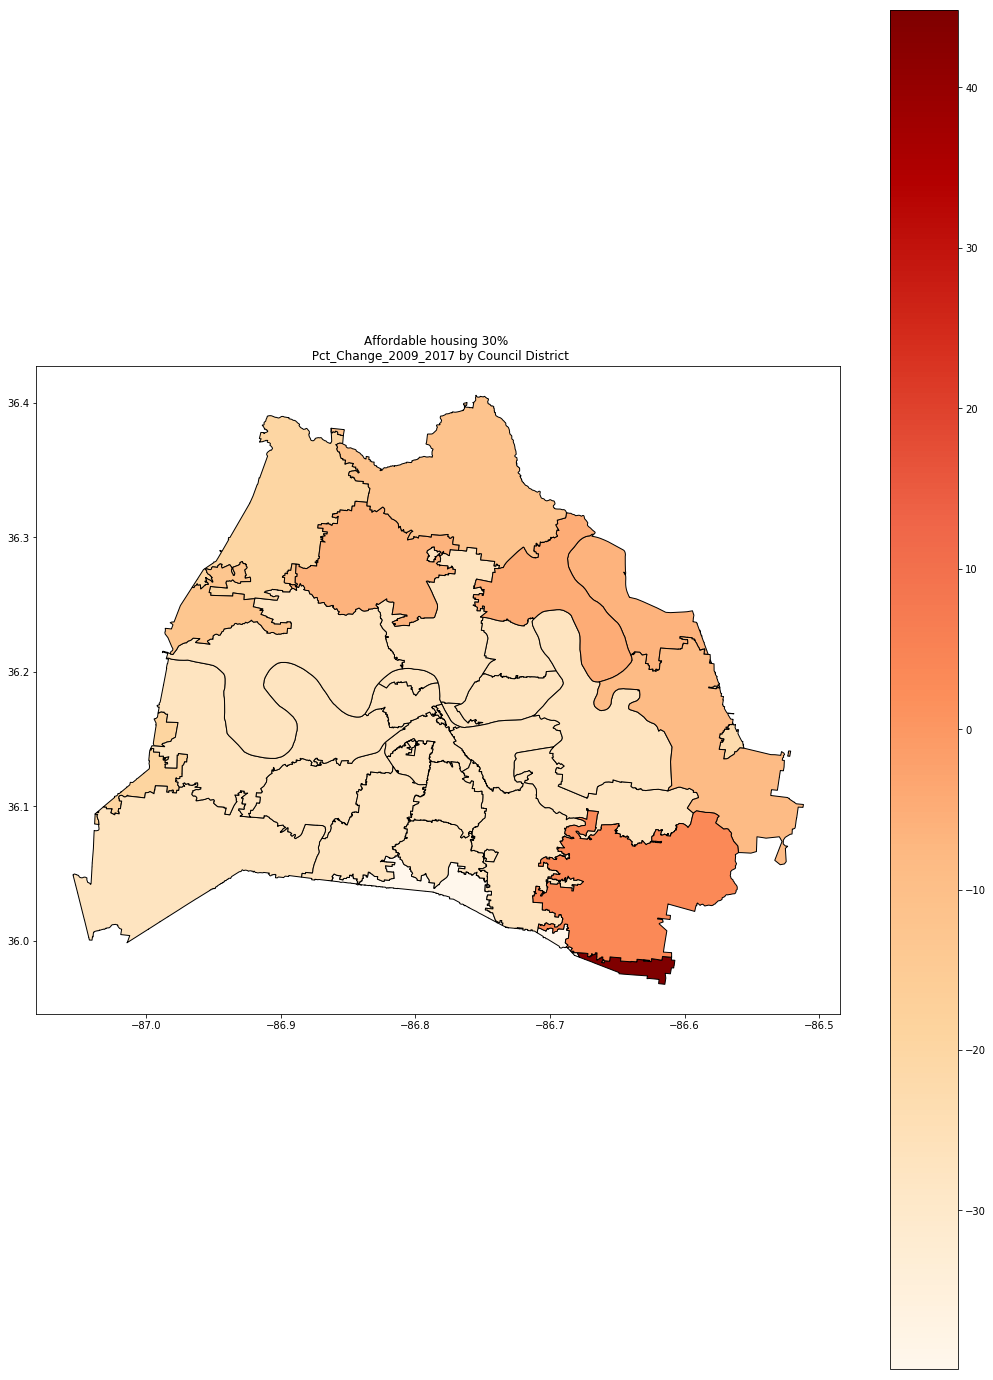

In [92]:
leg_kwds = {'title': 'City', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}
merged2.plot(column = 'Pct_Change_2009_2017', figsize=(18,25), cmap='OrRd',edgecolor = 'black',legend = True,legend_kwds = leg_kwds)
plt.title("Affordable housing 30% \n Pct_Change_2009_2017 by Council District")
for idx, row in merged2.iterrows():
    plt.annotate(s=row['AddressCity'], xy=row['coords'],
                 horizontalalignment='center')


leg_kwds = {'title': 'City', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}
merged3.plot(column = 'Pct_Change_2009_2017', figsize=(18,25), cmap='OrRd',edgecolor = 'black',legend = True,legend_kwds = leg_kwds)
plt.title("Workforce housing 30% \n Pct_Change_2009_2017 by Council District")
for idx, row in merged3.iterrows():
    plt.annotate(s=row['AddressCity'], xy=row['coords'],
                 horizontalalignment='center')